In [220]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [34]:
raw_data = pd.read_pickle('./Data_Generation/df_pickle/question-context-20-emb.pkl')

In [35]:
raw_data

,index,context,question,question_embedding,context_embedding
0,0,How can we build intelligent machines? More t...,What was the subject of Alan Turing's famous e...,"[tensor(-0.0308), tensor(-0.0802), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
1,1,How can we build intelligent machines? More t...,How did Alan Turing suggest we approach the qu...,"[tensor(0.0078), tensor(-0.1214), tensor(-0.32...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
2,2,How can we build intelligent machines? More t...,What did Alan Turing propose as an alternative...,"[tensor(-0.1040), tensor(-0.2294), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
3,3,How can we build intelligent machines? More t...,What did Turing suggest we should do instead o...,"[tensor(0.0062), tensor(-0.0955), tensor(-0.22...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
4,4,How can we build intelligent machines? More t...,How did Turing propose we should build a human...,"[tensor(-0.0133), tensor(-0.1910), tensor(-0.2...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
...,...,...,...,...,...
3195,15,Our third measure of cluster similarity is ba...,What is the Gaussian mixture-model used for?,"[tensor(-0.1037), tensor(-0.5570), tensor(-0.2...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3196,16,Our third measure of cluster similarity is ba...,What is the EM algorithm used for in the conte...,"[tensor(7.8840e-05), tensor(-0.7687), tensor(-...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3197,17,Our third measure of cluster similarity is ba...,Who is credited with first using mixture model...,"[tensor(0.1196), tensor(-0.2591), tensor(-0.30...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3198,18,Our third measure of cluster similarity is ba...,When was the EM algorithm first named?,"[tensor(0.1602), tensor(-0.6306), tensor(-0.31...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."


In [72]:
# remove the embedding columns and add their values to a list with the respective question and context:
df = pd.DataFrame(columns=['question', 'context'])
for _, row in raw_data.iterrows():
    df = df.append({'question': tuple([row['question'], row['question_embedding']]), 'context': tuple([row['context'], row['context_embedding']])}, ignore_index=True)


C:\Users\anton\AppData\Local\Temp\ipykernel_4564\2874624168.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'question': tuple([row['question'], row['question_embedding']]), 'context': tuple([row['context'], row['context_embedding']])}, ignore_index=True)
C:\Users\anton\AppData\Local\Temp\ipykernel_4564\2874624168.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'question': tuple([row['question'], row['question_embedding']]), 'context': tuple([row['context'], row['context_embedding']])}, ignore_index=True)
C:\Users\anton\AppData\Local\Temp\ipykernel_4564\2874624168.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'question': tuple([row['question'], row['question_embed

In [74]:
df['question'][0]

("What was the subject of Alan Turing's famous essay?",
 tensor([-3.0775e-02, -8.0151e-02, -3.6273e-01, -4.4650e-03, -1.0872e-01,
         -1.7822e-01,  2.8433e-01,  2.9013e-02,  8.1789e-02,  1.0240e-01,
          3.2044e-01,  4.2651e-01, -1.2573e-01, -3.5791e-01,  1.5113e-01,
         -4.3233e-02,  1.9547e-01,  1.5379e-01, -1.8139e-01, -4.0983e-02,
         -1.7845e-01,  1.2053e-01, -7.4158e-02,  1.8182e-02,  9.4475e-02,
         -1.8147e-01, -9.8357e-02,  2.4219e-02,  8.6154e-02,  1.5063e-01,
         -2.8149e-01,  9.7274e-03, -1.4438e-01,  3.9230e-02, -9.5568e-05,
         -1.1544e-01,  1.4801e-01,  8.0018e-02,  1.1212e-01,  3.0907e-02,
          1.3008e-01,  2.1740e-01,  1.1332e-01, -1.6400e-01,  5.2905e-02,
          1.3186e-01,  1.9354e-01, -1.4811e-01,  4.1093e-02,  1.5447e-01,
          3.8768e-01, -1.9831e-02,  3.2974e-01, -9.4937e-02,  3.4086e-01,
         -2.3336e-01,  7.5341e-02, -7.2540e-02,  1.5114e-01,  7.9593e-02,
          3.6839e-02,  2.5227e-02,  9.5371e-02,  7.9122e

In [75]:

# create a sample dataframe
#raw_data = pd.DataFrame({'question': ['What is your name?', 'What is your age?',"what is 2+3","what is 2+3",3],
#                   'context': ['My name is Stephen Hawking.', 'I am 76 years old.',5,"the number 5",3]})


# Assuming you have a DataFrame called df with 4 columns 'question' 'answer' and embeddings for both
questions = df['question'].unique()
answers = df['context'].unique()

# Create a dictionary with question-answer pairs as keys and 1 as the value and also add their embeddings
original_pairs = {(row['question'], row['context']): 1 for _, row in df.iterrows()}
# Generate all possible combinations and check if they are in the original_pairs dictionary and add their embeddings which should not be the product of the embeddings of the question and answer
df = pd.DataFrame([(q, c, original_pairs.get((q, c,), 0)) for q, c in product(questions, answers)], columns=['question', 'context', 'label'])

In [87]:
df

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506395,(What is the goal of density estimation and ho...,(10.1.3 Cross-validation for quantifying gener...,0
506396,(What is the goal of density estimation and ho...,(10.1.4 Cross-validation for model selection W...,0
506397,(What is the goal of density estimation and ho...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506398,(What is the goal of density estimation and ho...,(The Apriori algorithm is very efficient at id...,0


In [89]:
test_q = np.random.choice(df['question'].unique(), size = int(len(df['question'].unique())*0.2), replace = False)

In [90]:
test = df[df['question'].isin(test_q)]
train = df[~df['question'].isin(test_q)]


In [92]:
train

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506075,(Who is credited with first using mixture mode...,(10.1.3 Cross-validation for quantifying gener...,0
506076,(Who is credited with first using mixture mode...,(10.1.4 Cross-validation for model selection W...,0
506077,(Who is credited with first using mixture mode...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506078,(Who is credited with first using mixture mode...,(The Apriori algorithm is very efficient at id...,0


Neural Net

In [228]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as metrics

In [231]:
neural_net = Sequential()
neural_net.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net.add(Dense(256, activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])




In [209]:
#Select the second element of the tuple which is the embedding:
X_train_q = np.asarray([np.array(x[1]) for x in train['question']])
X_train_c = np.asarray([np.array(x[1]) for x in train['context']])
X_train = np.concatenate((X_train_q, X_train_c), axis=1)

In [212]:
X_test_q = np.asarray([np.array(x[1]) for x in test['question']])
X_test_c = np.asarray([np.array(x[1]) for x in test['context']])
X_test = np.concatenate((X_test_q, X_test_c), axis=1)


In [217]:
y_train = train['label'].values
y_test = test['label'].values

In [232]:
baseline_history = neural_net.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
3165/3165 [==============================] - 27s 8ms/step - loss: 0.0353 - tp: 0.0000e+00 - fp: 106.0000 - tn: 402459.0000 - fn: 2555.0000 - accuracy: 0.9934 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7341 - prc: 0.0305 - val_loss: 0.0362 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 100637.0000 - val_fn: 643.0000 - val_accuracy: 0.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7326 - val_prc: 0.0883
Epoch 2/10
3165/3165 [==============================] - 25s 8ms/step - loss: 0.0274 - tp: 16.0000 - fp: 6.0000 - tn: 402559.0000 - fn: 2539.0000 - accuracy: 0.9937 - precision: 0.7273 - recall: 0.0063 - auc: 0.8928 - prc: 0.1291 - val_loss: 0.0257 - val_tp: 5.0000 - val_fp: 0.0000e+00 - val_tn: 100637.0000 - val_fn: 638.0000 - val_accuracy: 0.9937 - val_precision: 1.0000 - val_recall: 0.0078 - val_auc: 0.9181 - val_prc: 0.1897
Epoch 3/10
3165/3165 [==============================] - 25s 8ms/step - loss: 0.0238 - tp: 91.0000 - fp: 51.0000 -

In [221]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
              linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

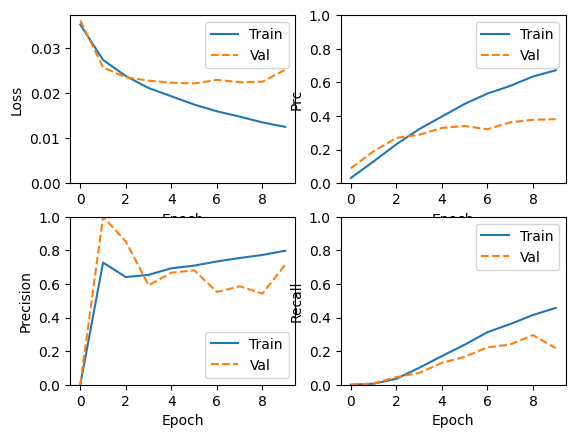

In [233]:
plot_metrics(baseline_history)